In [1]:
import torch
import sys
import numpy as np
sys_path = 'D:/Research_CAE/MyTinyCUDANN/tiny-cuda-nn/main'
sys.path.append(sys_path)
from PDE import High_contrast_Poisson
from matplotlib import pyplot as plt
device = "cpu" #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
eq = High_contrast_Poisson()
a = eq.a

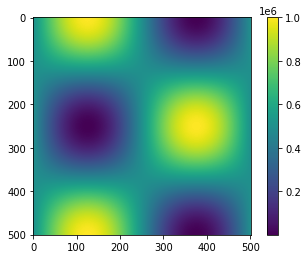

In [3]:
field_min = 0
field_max = 1
resolution = 501
x1_list = np.linspace(field_min, field_max, resolution)
x2_list = np.linspace(field_min, field_max, resolution)
X1,X2 = np.meshgrid(x1_list,x2_list)
X_field = torch.tensor(np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis = 1)).float().to(device)
a_xy = a(X_field)
real_solution = a_xy.reshape(resolution,resolution)
plt.imshow(real_solution)
plt.colorbar()

In [27]:
a_xy.min(), a_xy.max()

(tensor(1.0004), tensor(9.9996))

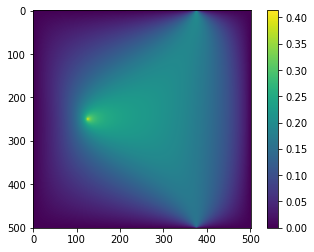

In [8]:
a = np.loadtxt('D:\\Research_CAE\\MyTinyCUDANN\\tiny-cuda-nn\\main\\High_contrast_Poisson\\true\\u_eval_eps=1.0_ratio=1000000.0.txt').reshape(501,501)
plt.imshow(a)
plt.colorbar()